In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.dates as mdates

plt.rcParams["axes.unicode_minus"] = False
rc("font", family="Arial Unicode MS")
# %matplotlib inline
get_ipython().run_line_magic("matplotlib", "inline")

# 광종별 소비현황 231231

In [ ]:
consumption_mineral_type = pd.read_csv('광종별 소비현황_20231231.csv', encoding='cp949')
consumption_mineral_type

,광종,품목,대륙,국가,단위,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량
0,알루미늄,refined,EUROPE,Austria,천톤,293.867,253.700,201.000,225.800,220.751,226.106,247.578,260.381,246.674,190.106,198.989,337.973,272.189
1,알루미늄,refined,EUROPE,Belarus,천톤,10.200,10.200,10.200,29.598,21.898,30.197,27.001,27.052,31.673,29.178,39.481,3.276,2.400
2,알루미늄,refined,EUROPE,Belgium,천톤,382.312,344.280,236.780,202.967,231.648,184.982,212.039,233.065,181.368,138.809,204.808,257.193,160.985
3,알루미늄,refined,EUROPE,Bulgaria,천톤,52.188,53.527,60.645,87.027,109.824,110.526,109.522,111.927,119.211,95.958,128.057,121.134,97.254
4,알루미늄,refined,EUROPE,Croatia,천톤,77.771,83.684,76.755,66.065,24.672,52.033,96.463,112.930,136.757,143.869,159.163,135.867,129.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,아연,slab,AMERICA,U.S.A.,천톤,939.000,892.000,935.000,962.000,931.000,788.980,829.000,1800.000,1800.000,950.000,878.000,973.000,911.000
406,아연,slab,AMERICA,Uruguay,천톤,0.000,0.520,0.514,0.304,0.449,0.316,0.312,0.235,0.235,0.299,0.350,0.360,0.371
407,아연,slab,AMERICA,Venezuela,천톤,10.430,6.656,9.014,4.872,2.246,1.994,0.685,0.596,0.596,0.442,0.360,0.300,0.370
408,아연,slab,OCEANIA,Australia,천톤,207.319,116.293,180.000,174.400,176.000,178.000,145.000,146.700,146.700,135.000,122.000,125.000,96.000


In [ ]:
consumption_nickel = consumption_mineral_type[consumption_mineral_type['광종']=='니켈']
consumption_nickel

,광종,품목,대륙,국가,단위,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량
224,니켈,refined,EUROPE,Austria,천톤,9.334,8.391,7.965,7.571,6.667,7.021,8.423,7.978,9.052,10.016,6.101,7.152,8.386
225,니켈,refined,EUROPE,Belgium,천톤,29.794,18.827,26.000,29.129,35.022,31.415,29.080,34.137,35.190,33.392,34.046,25.826,34.825
226,니켈,refined,EUROPE,Bulgaria,천톤,0.157,0.125,0.141,0.137,0.167,0.120,0.114,0.134,0.149,0.179,0.211,0.185,0.149
227,니켈,refined,EUROPE,Czech Republic,천톤,3.595,1.891,0.410,3.011,2.882,2.997,2.870,2.163,2.223,2.000,2.297,1.513,1.827
228,니켈,refined,EUROPE,Denmark,천톤,0.046,0.189,0.063,0.056,0.242,0.372,0.346,0.589,0.544,0.397,0.269,0.560,0.517
229,니켈,refined,EUROPE,Finland,천톤,29.002,25.141,15.367,19.505,27.126,32.559,31.489,27.254,28.638,26.800,25.911,37.298,34.689
230,니켈,refined,EUROPE,France,천톤,29.674,27.014,22.770,28.333,29.242,26.451,29.456,32.810,34.492,29.312,31.511,34.825,34.776
231,니켈,refined,EUROPE,Germany,천톤,88.404,88.790,66.146,62.158,60.201,57.552,64.453,60.624,57.271,49.740,56.959,59.851,51.070
232,니켈,refined,EUROPE,Greece,천톤,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180
233,니켈,refined,EUROPE,Hungary,천톤,0.115,0.119,0.244,0.403,0.453,0.496,0.848,0.418,0.215,0.233,0.167,0.132,0.120


In [ ]:
consumption_nickel.drop(consumption_nickel.columns[[0,1,4]], axis=1, inplace=True)
consumption_nickel

/var/folders/76/s5yjdqqx35ndv0dqcfnm6y0w0000gn/T/ipykernel_19205/591830223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_nickel.drop(consumption_nickel.columns[[0,1,4]], axis=1, inplace=True)


,대륙,국가,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량
224,EUROPE,Austria,9.334,8.391,7.965,7.571,6.667,7.021,8.423,7.978,9.052,10.016,6.101,7.152,8.386
225,EUROPE,Belgium,29.794,18.827,26.000,29.129,35.022,31.415,29.080,34.137,35.190,33.392,34.046,25.826,34.825
226,EUROPE,Bulgaria,0.157,0.125,0.141,0.137,0.167,0.120,0.114,0.134,0.149,0.179,0.211,0.185,0.149
227,EUROPE,Czech Republic,3.595,1.891,0.410,3.011,2.882,2.997,2.870,2.163,2.223,2.000,2.297,1.513,1.827
228,EUROPE,Denmark,0.046,0.189,0.063,0.056,0.242,0.372,0.346,0.589,0.544,0.397,0.269,0.560,0.517
229,EUROPE,Finland,29.002,25.141,15.367,19.505,27.126,32.559,31.489,27.254,28.638,26.800,25.911,37.298,34.689
230,EUROPE,France,29.674,27.014,22.770,28.333,29.242,26.451,29.456,32.810,34.492,29.312,31.511,34.825,34.776
231,EUROPE,Germany,88.404,88.790,66.146,62.158,60.201,57.552,64.453,60.624,57.271,49.740,56.959,59.851,51.070
232,EUROPE,Greece,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180
233,EUROPE,Hungary,0.115,0.119,0.244,0.403,0.453,0.496,0.848,0.418,0.215,0.233,0.167,0.132,0.120


In [ ]:
consumption_nickel = consumption_nickel.reset_index(drop=True)
consumption_nickel

,대륙,국가,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량
0,EUROPE,Austria,9.334,8.391,7.965,7.571,6.667,7.021,8.423,7.978,9.052,10.016,6.101,7.152,8.386
1,EUROPE,Belgium,29.794,18.827,26.000,29.129,35.022,31.415,29.080,34.137,35.190,33.392,34.046,25.826,34.825
2,EUROPE,Bulgaria,0.157,0.125,0.141,0.137,0.167,0.120,0.114,0.134,0.149,0.179,0.211,0.185,0.149
3,EUROPE,Czech Republic,3.595,1.891,0.410,3.011,2.882,2.997,2.870,2.163,2.223,2.000,2.297,1.513,1.827
4,EUROPE,Denmark,0.046,0.189,0.063,0.056,0.242,0.372,0.346,0.589,0.544,0.397,0.269,0.560,0.517
5,EUROPE,Finland,29.002,25.141,15.367,19.505,27.126,32.559,31.489,27.254,28.638,26.800,25.911,37.298,34.689
6,EUROPE,France,29.674,27.014,22.770,28.333,29.242,26.451,29.456,32.810,34.492,29.312,31.511,34.825,34.776
7,EUROPE,Germany,88.404,88.790,66.146,62.158,60.201,57.552,64.453,60.624,57.271,49.740,56.959,59.851,51.070
8,EUROPE,Greece,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.180
9,EUROPE,Hungary,0.115,0.119,0.244,0.403,0.453,0.496,0.848,0.418,0.215,0.233,0.167,0.132,0.120


In [ ]:
consumption_nickel = consumption_nickel.pivot_table(index=['대륙', '국가'])
consumption_nickel

2011 소비량  2012 소비량  2013 소비량  2014 소비량  \
대륙      국가                                                             
AFRICA  South Africa            33.620    31.995    35.246    31.458   
AMERICA Argentina                0.974     0.806     0.892     0.501   
        Brazil                  26.910    22.455    21.180    26.616   
        Canada                   4.261     4.677     4.902    13.644   
        Chile                    0.105     0.054     0.112     0.105   
        Cuba                     0.120     0.120     0.120     0.120   
        Mexico                   2.261     2.324     2.339     2.936   
        U.S.A.                 130.219   124.802   118.748   148.218   
ASIA    China                  702.597   804.920   909.200   654.118   
        Hong Kong               12.000    12.000    12.000    12.000   
        India                   26.928    32.964    37.996    27.019   
        Indonesia                0.780     0.780     0.780     0.780   
        Japan                  173.588   159.317   158.651   157.425   
        Kazakhstan               0.423     0.000     0.000     0.000   
        Malaysia                 1.156     4.670     9.120     9.120   
        North Korea              0.480     0.480     0.480     0.480   
        Philippines              0.000     0.068     0.183     0.180   
        Saudi Arabia             0.241     0.154     0.097     0.216   
        Singapore                4.080     4.080     4.080     4.040   
        South Korea             97.772   107.069   107.321   100.301   
        Taiwan                  53.199    56.833    52.747    65.796   
        Thailand                 0.600     2.886     2.520     2.325   
        Turkey                   3.931     3.757     3.909     3.899   
        United Arab Emirates     1.800     1.800     1.800     1.800   
        Vietnam                  1.200     1.200     1.200     1.200   
EUROPE  Austria                  9.334     8.391     7.965     7.571   
        Belgium                 29.794    18.827    26.000    29.129   
        Bulgaria                 0.157     0.125     0.141     0.137   
        Czech Republic           3.595     1.891     0.410     3.011   
        Denmark                  0.046     0.189     0.063     0.056   
        Finland                 29.002    25.141    15.367    19.505   
        France                  29.674    27.014    22.770    28.333   
        Germany                 88.404    88.790    66.146    62.158   
        Greece                   0.180     0.180     0.180     0.180   
        Hungary                  0.115     0.119     0.244     0.403   
        Italy                   65.773    64.691    59.421    60.044   
        Macedonia                1.200     1.200     1.200     1.200   
        Norway                   0.300     0.300     0.300     0.300   
        Poland                   2.519     2.300     3.000     3.000   
        Portugal                 0.000     0.202     0.307     0.239   
        Romania                  0.463     0.394     0.517     0.543   
        Russia                  24.000    29.793    24.802    10.071   
        Serbia                   0.000     0.128     0.176     0.109   
        Slovenia                 0.637     0.807     1.417     1.118   
        Spain                   29.225    32.464    31.770    32.593   
        Sweden                  29.688    22.222    23.650    25.926   
        Switzerland              0.671     0.595     0.678     0.567   
        Ukraine                  7.428     3.039     4.844     5.152   
        United Kingdom          18.600    18.700    15.500    21.788   
OCEANIA Australia                1.600     1.600     1.600     1.600   
        New Zealand              0.040     0.031     0.049     0.043   

                              2015 소비량  2016 소비량  2017 소비량  2018 소비량  \
대륙      국가                                                             
AFRICA  South Africa            41.630    45.768    48.825    48.885 

## 대륙간 그래프

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

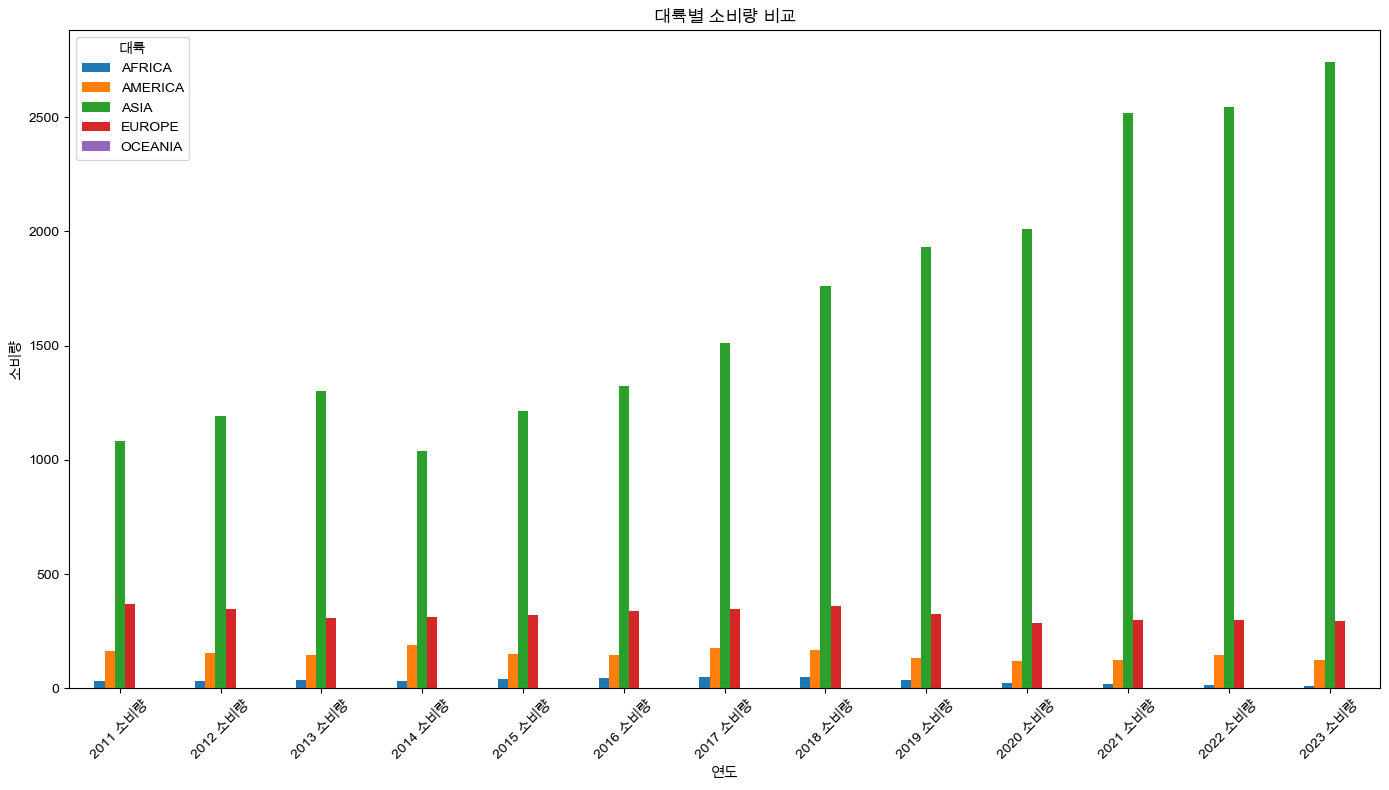

In [ ]:
# 연도별 생산량 데이터 추출
years = [str(year) + ' 소비량' for year in range(2011, 2024)]
# 대륙별 생산량 집계
continent_production = consumption_nickel.groupby('대륙')[years].sum().T

# 그룹화된 바 차트 생성
continent_production.plot(kind='bar', figsize=(14, 8))
plt.xlabel('연도')
plt.ylabel('소비량')
plt.title('대륙별 소비량 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# '대륙'이 'ASIA'인 행만 추출
df_asia = consumption_nickel.loc['ASIA']
df_asia

,2011 소비량,2012 소비량,2013 소비량,2014 소비량,2015 소비량,2016 소비량,2017 소비량,2018 소비량,2019 소비량,2020 소비량,2021 소비량,2022 소비량,2023 소비량
국가,,,,,,,,,,,,,
China,702.597,804.920,909.200,654.118,843.149,897.659,982.018,1096.418,1304.292,1415.717,1651.338,1747.482,2050.164
Hong Kong,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000,12.000
India,26.928,32.964,37.996,27.019,37.080,57.367,82.140,72.073,58.480,64.078,75.237,56.173,47.271
Indonesia,0.780,0.780,0.780,0.780,0.780,0.780,61.149,176.413,180.701,223.407,400.305,375.135,315.375
Japan,173.588,159.317,158.651,157.425,150.597,161.945,162.777,175.156,154.688,148.789,168.008,181.918,159.443
Kazakhstan,0.423,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Malaysia,1.156,4.670,9.120,9.120,9.000,9.000,9.000,9.000,9.000,9.000,9.000,9.000,9.000
North Korea,0.480,0.480,0.480,0.480,0.480,0.480,0.480,0.536,0.540,0.540,0.540,0.540,0.540
Philippines,0.000,0.068,0.183,0.180,0.395,0.160,0.254,0.940,0.374,0.112,0.475,0.588,0.592


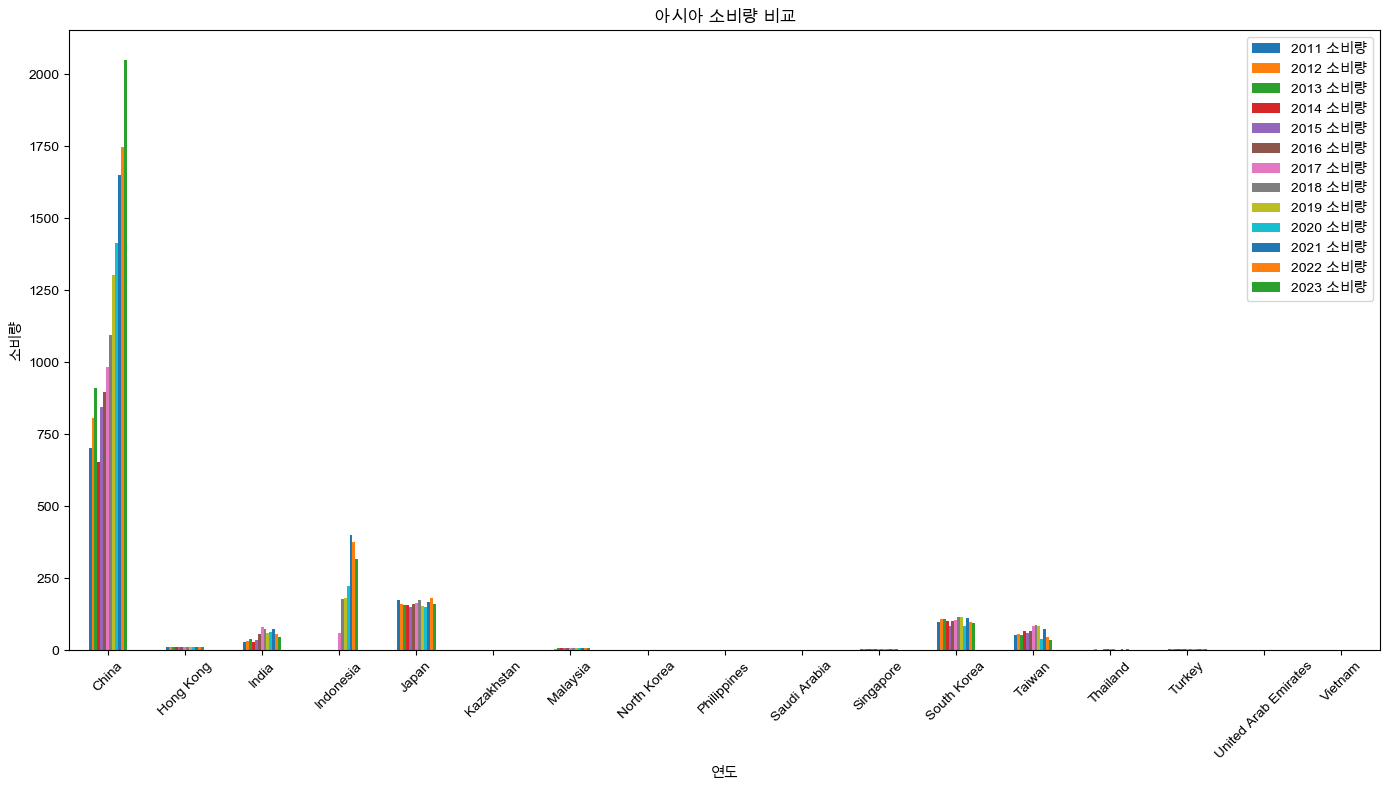

In [ ]:
# 연도별 생산량 데이터 추출
years = [str(year) + ' 소비량' for year in range(2011, 2024)]
# 대륙별 생산량 집계
continent_production = df_asia.groupby('국가')[years].sum().T
# 그룹화된 바 차트 생성
df_asia.plot(kind='bar', figsize=(14, 8))
plt.xlabel('연도')
plt.ylabel('소비량')
plt.title('아시아 소비량 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## (1) 니켈

- 가격기준 LME CASH | USD/ton

In [ ]:
# 데이터 불러오기
nickel_actual_price_d = pd.read_excel('니켈+가격_daily.xls', skiprows=9)
nickel_actual_price_m = pd.read_excel('니켈+가격_monthly.xls', skiprows=9)
nickel_stability_index = pd.read_excel('니켈+수급안정화지수2024-06-10.xls',skiprows=2)

In [ ]:
nickel_actual_price_d

,Unnamed: 0,기준일,기준가격,등락가,등락비율,재고량,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,2014-06-10,18455,-305,-1.63,286626,NaN,NaN,NaN,NaN
1,NaN,2014-06-11,18350,-105,-0.57,286752,NaN,NaN,NaN,NaN
2,NaN,2014-06-12,18030,-320,-1.74,286482,NaN,NaN,NaN,NaN
3,NaN,2014-06-13,17950,-80,-0.44,286710,NaN,NaN,NaN,NaN
4,NaN,2014-06-16,18315,365,2.03,286668,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2522,NaN,2024-06-03,19325,-505,-2.55,83724,NaN,NaN,NaN,NaN
2523,NaN,2024-06-04,18900,-425,-2.20,83514,NaN,NaN,NaN,NaN
2524,NaN,2024-06-05,18340,-560,-2.96,84720,NaN,NaN,NaN,NaN
2525,NaN,2024-06-06,18130,-210,-1.15,84756,NaN,NaN,NaN,NaN


In [ ]:
# 필요없는 컬럼 삭제
nickel_actual_price_d.drop(nickel_actual_price_d.columns[[0,6,7,8,9]], axis=1, inplace=True)
nickel_actual_price_m.drop(nickel_actual_price_m.columns[[0,6,7,8,9]], axis=1, inplace=True)
nickel_stability_index.drop(nickel_stability_index.columns[0], axis=1, inplace=True)

In [ ]:
nickel_actual_price_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일     2527 non-null   object 
 1   기준가격    2527 non-null   int64  
 2   등락가     2527 non-null   int64  
 3   등락비율    2527 non-null   float64
 4   재고량     2527 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 98.8+ KB


In [ ]:
nickel_stability_index

,기준일,수급안정화지수,전월대비 등락가,전월대비 등락율
0,201701,NaN,0.00,0.00
1,201702,78.24,0.00,0.00
2,201703,74.56,-3.68,-4.70
3,201704,77.10,2.54,3.41
4,201705,80.06,2.96,3.84
...,...,...,...,...
84,202401,48.14,0.74,1.56
85,202402,52.14,4.00,8.32
86,202403,51.21,-0.93,-1.78
87,202404,44.00,-7.22,-14.09


In [ ]:
nickel_actual_price_d['기준일'] = pd.to_datetime(nickel_actual_price_d['기준일'])
nickel_actual_price_m['기준일'] = pd.to_datetime(nickel_actual_price_m['기준일'])

In [ ]:
nickel_actual_price_m

,기준일,기준가격,등락가,등락비율,재고량
0,2014-06-01,18573.57,-866.18,-4.46,293979
1,2014-07-01,19050.43,476.86,2.57,309154
2,2014-08-01,18575.75,-474.68,-2.49,322187
3,2014-09-01,18079.32,-496.43,-2.67,337716
4,2014-10-01,15770.43,-2308.89,-12.77,372263
...,...,...,...,...,...
116,2024-02-01,16307.62,216.26,1.34,71161
117,2024-03-01,17432.75,1125.13,6.90,75483
118,2024-04-01,18173.81,741.06,4.25,76271
119,2024-05-01,19520.00,1346.19,7.41,81607


In [ ]:
nickel_actual_price_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준일     121 non-null    datetime64[ns]
 1   기준가격    121 non-null    float64       
 2   등락가     121 non-null    float64       
 3   등락비율    121 non-null    float64       
 4   재고량     121 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 4.9 KB


In [ ]:
nickel_stability_index['기준일'] = nickel_stability_index['기준일'].astype(str).apply(lambda x: f"{x[:4]}-{x[4:]}")
nickel_stability_index['기준일'] = pd.to_datetime(nickel_stability_index['기준일'])
nickel_stability_index

,기준일,수급안정화지수,전월대비 등락가,전월대비 등락율
0,2017-01-01,NaN,0.00,0.00
1,2017-02-01,78.24,0.00,0.00
2,2017-03-01,74.56,-3.68,-4.70
3,2017-04-01,77.10,2.54,3.41
4,2017-05-01,80.06,2.96,3.84
...,...,...,...,...
84,2024-01-01,48.14,0.74,1.56
85,2024-02-01,52.14,4.00,8.32
86,2024-03-01,51.21,-0.93,-1.78
87,2024-04-01,44.00,-7.22,-14.09


In [ ]:
nickel_actual_price_m = nickel_actual_price_m[(nickel_actual_price_m['기준일']>='2017-01-01') & (nickel_actual_price_m['기준일']<='2024-05-01')]
nickel_actual_price_m

,기준일,기준가격,등락가,등락비율,재고량
31,2017-01-01,9984.29,-1028.96,-9.34,374047
32,2017-02-01,10619.50,635.21,6.36,381745
33,2017-03-01,10230.43,-389.07,-3.66,381883
34,2017-04-01,9668.61,-561.82,-5.49,375819
35,2017-05-01,9154.29,-514.32,-5.32,380589
...,...,...,...,...,...
115,2024-01-01,16091.36,-297.32,-1.81,68231
116,2024-02-01,16307.62,216.26,1.34,71161
117,2024-03-01,17432.75,1125.13,6.90,75483
118,2024-04-01,18173.81,741.06,4.25,76271


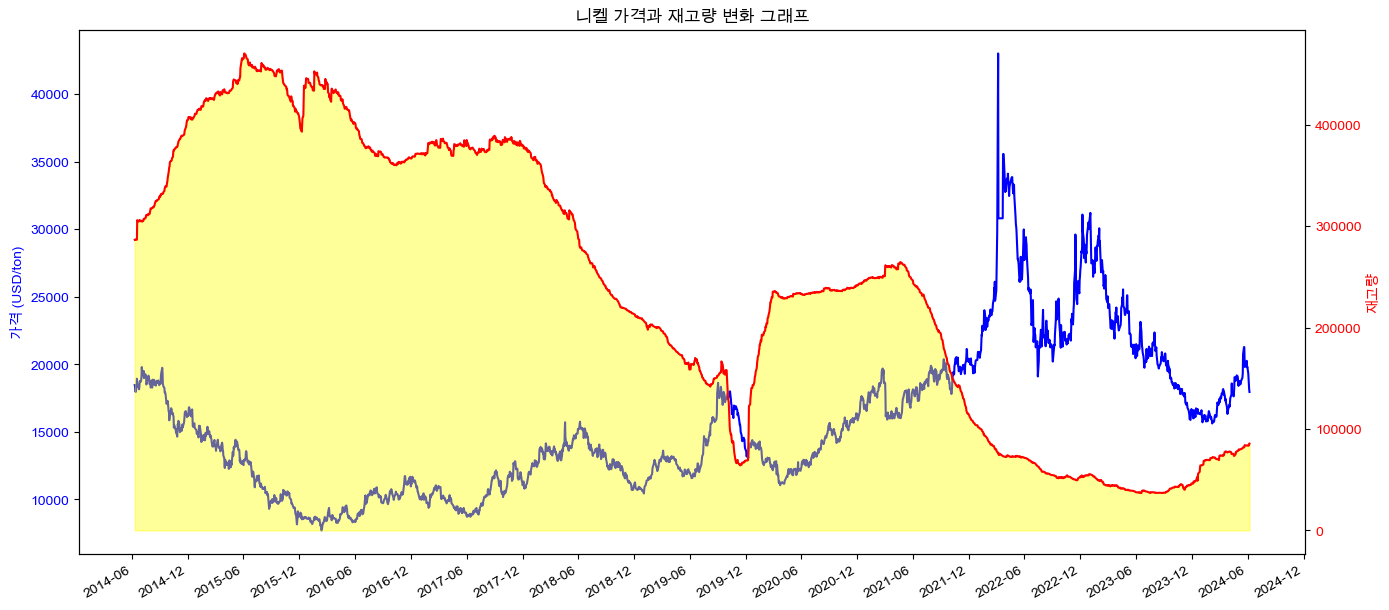

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# 첫 번째 y축: 기준가격
ax1.plot(nickel_actual_price_d['기준일'], nickel_actual_price_d['기준가격'], label='기준가격', color='b')
ax1.set_xlabel('')
ax1.set_ylabel('가격 (USD/ton)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 두 번째 y축: 재고량
ax2 = ax1.twinx()
ax2.plot(nickel_actual_price_d['기준일'], nickel_actual_price_d['재고량'], label='재고량', color='r')
ax2.fill_between(nickel_actual_price_d['기준일'], nickel_actual_price_d['재고량'], color='yellow', alpha=0.4)
ax2.set_ylabel('재고량', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('니켈 가격과 재고량 변화 그래프')
fig.tight_layout()


ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # 6개월 간격으로 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

plt.show()

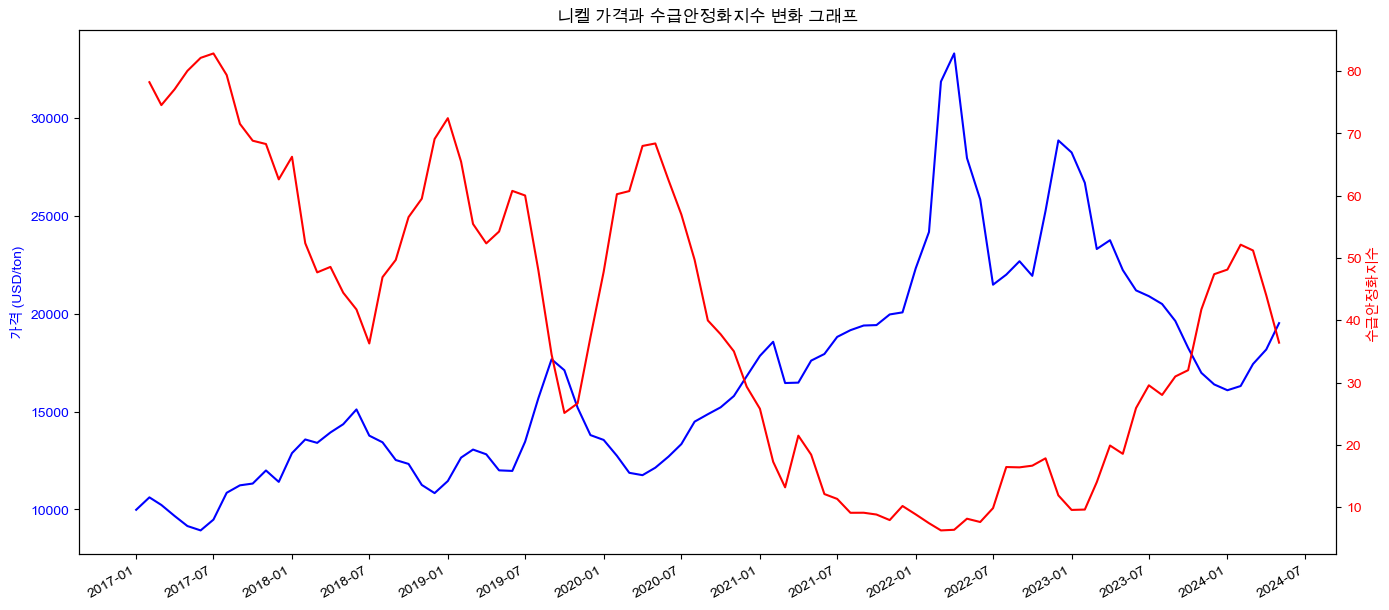

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# 첫 번째 y축: 기준가격
ax1.plot(nickel_actual_price_m['기준일'], nickel_actual_price_m['기준가격'], label='기준가격', color='b')
ax1.set_xlabel('')
ax1.set_ylabel('가격 (USD/ton)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 두 번째 y축: 수급안정화지수
ax2 = ax1.twinx()
ax2.plot(nickel_stability_index['기준일'], nickel_stability_index['수급안정화지수'], label='수급안정화지수', color='r')
ax2.set_ylabel('수급안정화지수', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('니켈 가격과 수급안정화지수 변화 그래프')
fig.tight_layout()


ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # 6개월 간격으로 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

plt.show()

- 수급위기(0~1&위기발생)
- 수급불안 (0~5)
- 수급주의 (5~20)
- 수급안정 (20~80)
- 공급과잉(80~100)

In [ ]:
df_nickel = pd.merge(nickel_actual_price_m, nickel_stability_index, on='기준일')
df_nickel

,기준일,기준가격,등락가,등락비율,재고량,수급안정화지수,전월대비 등락가,전월대비 등락율
0,2017-01-01,9984.29,-1028.96,-9.34,374047,NaN,0.00,0.00
1,2017-02-01,10619.50,635.21,6.36,381745,78.24,0.00,0.00
2,2017-03-01,10230.43,-389.07,-3.66,381883,74.56,-3.68,-4.70
3,2017-04-01,9668.61,-561.82,-5.49,375819,77.10,2.54,3.41
4,2017-05-01,9154.29,-514.32,-5.32,380589,80.06,2.96,3.84
...,...,...,...,...,...,...,...,...
84,2024-01-01,16091.36,-297.32,-1.81,68231,48.14,0.74,1.56
85,2024-02-01,16307.62,216.26,1.34,71161,52.14,4.00,8.32
86,2024-03-01,17432.75,1125.13,6.90,75483,51.21,-0.93,-1.78
87,2024-04-01,18173.81,741.06,4.25,76271,44.00,-7.22,-14.09


In [ ]:
df_nickel = df_nickel[df_nickel.columns[[0,1,4,5]]]


In [ ]:
df_nickel.dropna(inplace=True)
df_nickel

/var/folders/76/s5yjdqqx35ndv0dqcfnm6y0w0000gn/T/ipykernel_19205/1752841142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nickel.dropna(inplace=True)


,기준일,기준가격,재고량,수급안정화지수
1,2017-02-01,10619.50,381745,78.24
2,2017-03-01,10230.43,381883,74.56
3,2017-04-01,9668.61,375819,77.10
4,2017-05-01,9154.29,380589,80.06
5,2017-06-01,8930.68,377252,82.15
...,...,...,...,...
84,2024-01-01,16091.36,68231,48.14
85,2024-02-01,16307.62,71161,52.14
86,2024-03-01,17432.75,75483,51.21
87,2024-04-01,18173.81,76271,44.00


In [ ]:
df_nickel.info(), df_nickel.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 88
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   기준일      88 non-null     datetime64[ns]
 1   기준가격     88 non-null     float64       
 2   재고량      88 non-null     int64         
 3   수급안정화지수  88 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.4 KB


(None,
                                  기준일          기준가격            재고량    수급안정화지수
 count                             88     88.000000      88.000000  88.000000
 mean   2020-09-15 08:27:16.363636480  16812.049886  184898.636364  39.665000
 min              2017-02-01 00:00:00   8930.680000   37074.000000   6.240000
 25%              2018-11-23 12:00:00  12689.890000   72262.750000  17.112500
 50%              2020-09-16 00:00:00  15943.705000  195151.000000  40.850000
 75%              2022-07-08 18:00:00  19712.867500  249167.500000  59.657500
 max              2024-05-01 00:00:00  33298.420000  385273.000000  82.860000
 std                              NaN   5368.330550  113568.033086  23.256942)

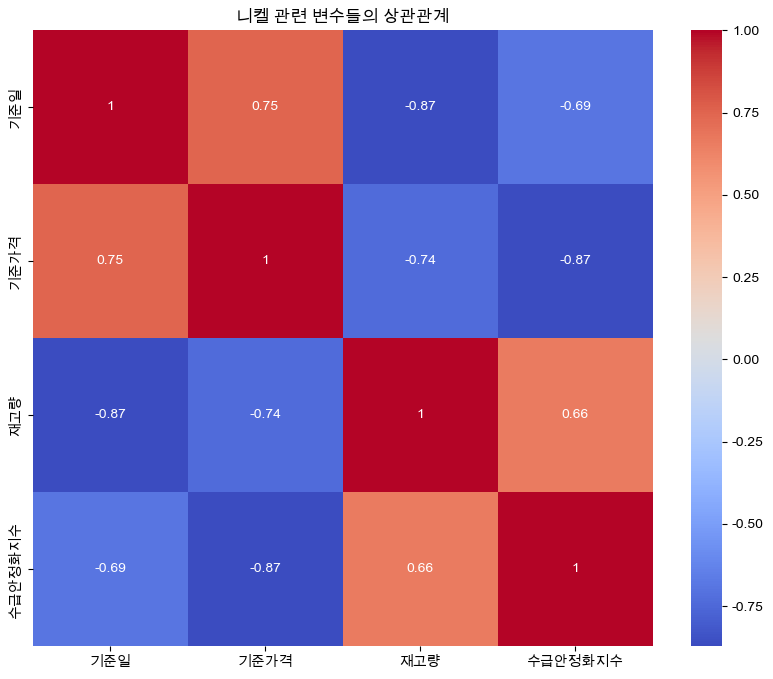

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_nickel.corr(), annot=True, cmap='coolwarm')
plt.title('니켈 관련 변수들의 상관관계')
plt.show()

0.8 ~ 1.0 (또는 -0.8 ~ -1.0): 매우 강한 상관관계

0.6 ~ 0.8 (또는 -0.6 ~ -0.8): 강한 상관관계

0.4 ~ 0.6 (또는 -0.4 ~ -0.6): 중간 정도의 상관관계

0.2 ~ 0.4 (또는 -0.2 ~ -0.4): 약한 상관관계

0.0 ~ 0.2 (또는 -0.0 ~ -0.2): 매우 약한 상관관계 또는 무시할 수 있는 상관관계

<Figure size 1200x600 with 0 Axes>

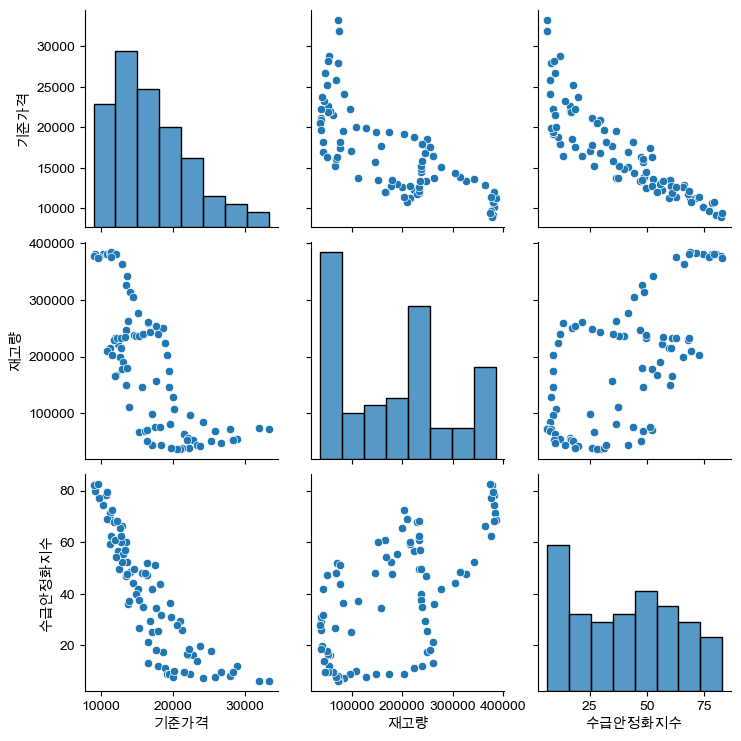

In [ ]:
# pairplot 으로 경향 확인
plt.figure(figsize=(12,6))
sns.pairplot(data=df_nickel)

- 기준 가격과 수급안정화지수가 상관관계가 높아보인다.

# 통계적 회귀

In [ ]:
import statsmodels.api as sm

In [ ]:
X = df_nickel['기준가격']
y = df_nickel['수급안정화지수']
lm = sm.OLS(y, X).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                수급안정화지수   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              79.66
Date:                Sat, 15 Jun 2024   Prob (F-statistic):                    6.39e-14
Time:                        20:35:18   Log-Likelihood:                         -433.02
No. Observations:                  88   AIC:                                      868.0
Df Residuals:                      87   BIC:                                      870.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 모형 적합도, y의 분산을 각각의 변수들이 약 99.8%로 설명할 수 있음
- Adj. R-squared : 독립변수가 여러 개인 다중회귀분석에서 사용
- Prob. F-Statistic : 회귀모형에 대한 통계적 유의미성 검정.
이 값이 0.05 이하라면 모집단에서도 의미가 있다고 볼 수 있음

In [ ]:
import plotly.express as px

fig = px.histogram(df_nickel, x='기준가격')
fig.show()

In [ ]:
df_nickel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 88
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   기준일      88 non-null     datetime64[ns]
 1   기준가격     88 non-null     float64       
 2   재고량      88 non-null     int64         
 3   수급안정화지수  88 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.4 KB


In [ ]:
nickel = df_nickel[['기준가격','재고량','수급안정화지수']]
nickel

,기준가격,재고량,수급안정화지수
1,10619.50,381745,78.24
2,10230.43,381883,74.56
3,9668.61,375819,77.10
4,9154.29,380589,80.06
5,8930.68,377252,82.15
...,...,...,...
84,16091.36,68231,48.14
85,16307.62,71161,52.14
86,17432.75,75483,51.21
87,18173.81,76271,44.00


In [ ]:
nickel = nickel.astype('float')
nickel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 88
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준가격     88 non-null     float64
 1   재고량      88 non-null     float64
 2   수급안정화지수  88 non-null     float64
dtypes: float64(3)
memory usage: 2.8 KB


In [ ]:
nickel

,기준일,기준가격,재고량,수급안정화지수
1,2017-02-01,10619.50,381745,78.24
2,2017-03-01,10230.43,381883,74.56
3,2017-04-01,9668.61,375819,77.10
4,2017-05-01,9154.29,380589,80.06
5,2017-06-01,8930.68,377252,82.15
...,...,...,...,...
84,2024-01-01,16091.36,68231,48.14
85,2024-02-01,16307.62,71161,52.14
86,2024-03-01,17432.75,75483,51.21
87,2024-04-01,18173.81,76271,44.00


In [ ]:
nickel['기준가격'].shape

(88,)

## stratify 제거

In [ ]:
# 데이터를 나누자
from sklearn.model_selection import train_test_split

X = nickel.drop(['기준가격'], axis=1)
y = nickel['기준가격']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
# LinearResgression을 사용하고
from sklearn.linear_model import LinearRegression

  reg = LinearRegression()
  reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 70 entries, 32 to 83
Series name: 기준가격
Non-Null Count  Dtype  
--------------  -----  
70 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


## 모델 평가는 RMS로


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)


RMSE of Train Data :  2291.2139143265204
RMSE of Test Data :  2836.6696736298222


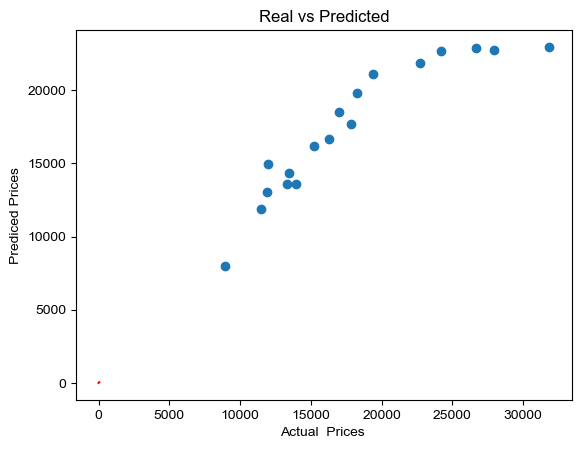

In [ ]:
# 성능 확인
plt.scatter(y_test, pred_test)
plt.xlabel("Actual  Prices ")
plt.ylabel("Prediced Prices")
plt.title("Real vs Predicted")
plt.plot([0,48], [0,48], 'r')
plt.show()

# 선형회귀

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# '기준일' 열을 제거하고 나머지 특징(features)과 목표(target)를 설정
X = nickel.drop([ '기준가격'], axis=1)
y = nickel['기준가격']

# 데이터를 훈련 세트와 테스트 세트로 분할 (stratify 제거)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# 모델 생성 및 훈련
lr = LinearRegression()
lr.fit(X_train, y_train)

# 예측
y_pred = lr.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Absolute Error: 1862.219742804486
Mean Squared Error: 8046694.8372911215
R2 Score: 0.7924124601070343


In [ ]:
nickel

,기준가격,재고량,수급안정화지수
1,10619.50,381745.0,78.24
2,10230.43,381883.0,74.56
3,9668.61,375819.0,77.10
4,9154.29,380589.0,80.06
5,8930.68,377252.0,82.15
...,...,...,...
84,16091.36,68231.0,48.14
85,16307.62,71161.0,52.14
86,17432.75,75483.0,51.21
87,18173.81,76271.0,44.00


# 다른방법.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# # 날짜 형식 변환
# nickel['기준일'] = pd.to_datetime(nickel['기준일'])

# 피처와 타겟 변수 설정
X = nickel[['재고량', '수급안정화지수']]
y = nickel['기준가격']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


# 랜덤포레스트

In [ ]:
# 랜덤 포레스트 모델 선택 및 학습
model = RandomForestRegressor(random_state=13)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Absolute Error: 906.7021666666687
Mean Squared Error: 1252541.9061740239
R2 Score: 0.9676870941208647


# 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 선택 및 학습
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 예측
y_pred = linear_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Linear Regression Results:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Linear Regression Results:
Mean Absolute Error: 1862.219742804486
Mean Squared Error: 8046694.8372911215
R2 Score: 0.7924124601070343


# 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso

# 라쏘 회귀 모델 선택 및 학습
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# 예측
y_pred = lasso_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Lasso Regression Results:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Lasso Regression Results:
Mean Absolute Error: 1862.223731466978
Mean Squared Error: 8046711.128789071
R2 Score: 0.7924120398211841


# 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge

# 릿지 회귀 모델 선택 및 학습
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 예측
y_pred = ridge_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Ridge Regression Results:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Ridge Regression Results:
Mean Absolute Error: 1862.298877852291
Mean Squared Error: 8047018.096891473
R2 Score: 0.7924041206997943


# LightGBM

In [ ]:
import lightgbm as lgb

# LightGBM 모델 선택 및 학습
lgb_model = lgb.LGBMRegressor(random_state=13)
lgb_model.fit(X_train, y_train)

# 예측
y_pred = lgb_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('LightGBM Results:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 50
[LightGBM] [Info] Number of data points in the train set: 70, number of used features: 2
[LightGBM] [Info] Start training from score 16529.956264
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

# XGBoost

In [ ]:
import xgboost as xgb

# XGBoost 모델 선택 및 학습
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=13)
xgb_model.fit(X_train, y_train)

# 예측
y_pred = xgb_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('XGBoost Results:')
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)


XGBoost Results:
Mean Absolute Error: 1042.9976974826386
Mean Squared Error: 2317974.4095878247
R2 Score: 0.9402012111865827


# Prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
nickel

,기준가격,재고량,수급안정화지수
1,10619.50,381745.0,78.24
2,10230.43,381883.0,74.56
3,9668.61,375819.0,77.10
4,9154.29,380589.0,80.06
5,8930.68,377252.0,82.15
...,...,...,...
84,16091.36,68231.0,48.14
85,16307.62,71161.0,52.14
86,17432.75,75483.0,51.21
87,18173.81,76271.0,44.00


In [ ]:
df_nickel

,기준일,기준가격,재고량,수급안정화지수
1,2017-02-01,10619.50,381745,78.24
2,2017-03-01,10230.43,381883,74.56
3,2017-04-01,9668.61,375819,77.10
4,2017-05-01,9154.29,380589,80.06
5,2017-06-01,8930.68,377252,82.15
...,...,...,...,...
84,2024-01-01,16091.36,68231,48.14
85,2024-02-01,16307.62,71161,52.14
86,2024-03-01,17432.75,75483,51.21
87,2024-04-01,18173.81,76271,44.00


In [ ]:
df_nickel['기준일'] = pd.to_datetime(df_nickel['기준일'])
df_nickel = df_nickel.rename(columns={'기준일': 'ds', '기준가격': 'y'})


/var/folders/76/s5yjdqqx35ndv0dqcfnm6y0w0000gn/T/ipykernel_19205/532415954.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_nickel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 1 to 88
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       88 non-null     datetime64[ns]
 1   y        88 non-null     float64       
 2   재고량      88 non-null     int64         
 3   수급안정화지수  88 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 3.4 KB


In [ ]:
# Prophet 모델 학습
model = Prophet()
model.fit(df_nickel)


02:01:50 - cmdstanpy - INFO - Chain [1] start processing
02:01:51 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# 향후 365일 예측
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

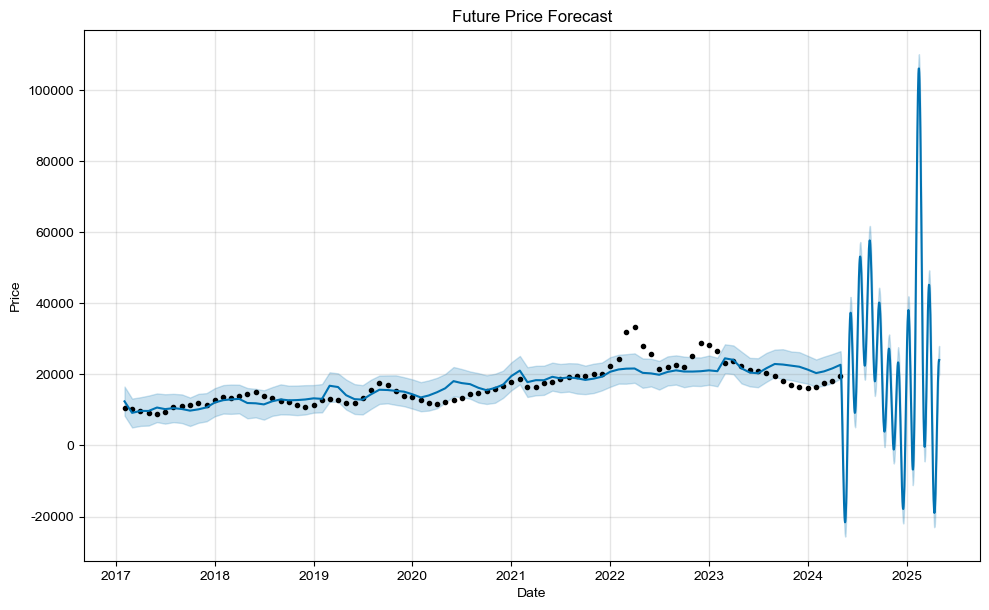

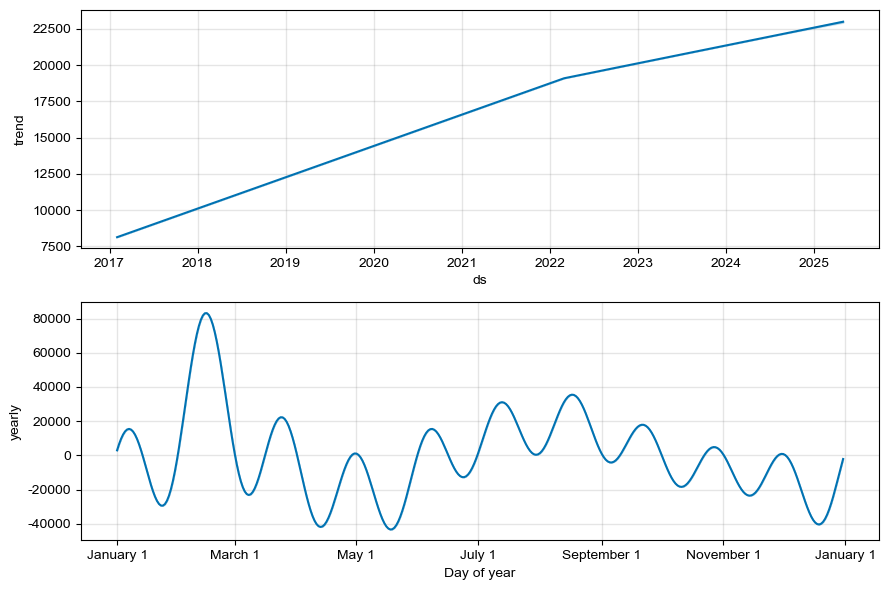

In [ ]:
# 예측 결과 그래프
fig1 = model.plot(forecast)
plt.title('Future Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 구성 요소 그래프
fig2 = model.plot_components(forecast)
plt.show()

In [ ]:
nickel_actual_price_d = pd.read_excel('니켈+가격_daily.xls', skiprows=9)

In [ ]:
nickel_actual_price_d.drop(nickel_actual_price_d.columns[[0,6,7,8,9]], axis=1, inplace=True)


In [ ]:
nickel_actual_price_d

,기준일,기준가격,등락가,등락비율,재고량
0,2014-06-10,18455,-305,-1.63,286626
1,2014-06-11,18350,-105,-0.57,286752
2,2014-06-12,18030,-320,-1.74,286482
3,2014-06-13,17950,-80,-0.44,286710
4,2014-06-16,18315,365,2.03,286668
...,...,...,...,...,...
2522,2024-06-03,19325,-505,-2.55,83724
2523,2024-06-04,18900,-425,-2.20,83514
2524,2024-06-05,18340,-560,-2.96,84720
2525,2024-06-06,18130,-210,-1.15,84756


In [ ]:
nickel_actual_price_d['기준일'] = pd.to_datetime(nickel_actual_price_d['기준일'])
nickel_actual_price_d = nickel_actual_price_d.rename(columns={'기준일': 'ds', '기준가격': 'y'})

In [ ]:
nickel_actual_price_d

,ds,y,등락가,등락비율,재고량
0,2014-06-10,18455,-305,-1.63,286626
1,2014-06-11,18350,-105,-0.57,286752
2,2014-06-12,18030,-320,-1.74,286482
3,2014-06-13,17950,-80,-0.44,286710
4,2014-06-16,18315,365,2.03,286668
...,...,...,...,...,...
2522,2024-06-03,19325,-505,-2.55,83724
2523,2024-06-04,18900,-425,-2.20,83514
2524,2024-06-05,18340,-560,-2.96,84720
2525,2024-06-06,18130,-210,-1.15,84756


In [ ]:
# Prophet 모델 학습
model = Prophet()
model.fit(nickel_actual_price_d)
# 향후 365일 예측
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

02:06:30 - cmdstanpy - INFO - Chain [1] start processing
02:06:31 - cmdstanpy - INFO - Chain [1] done processing


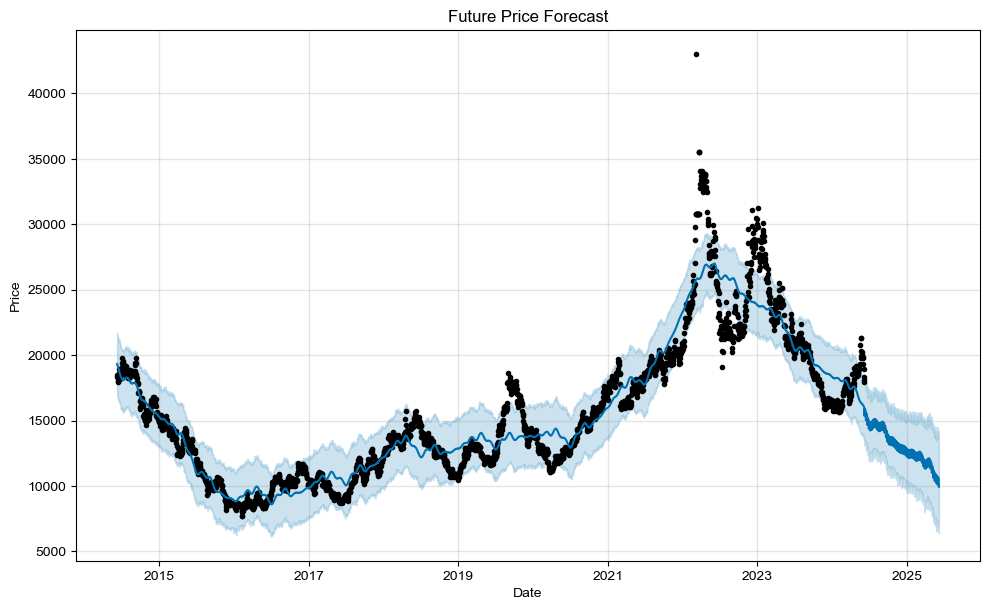

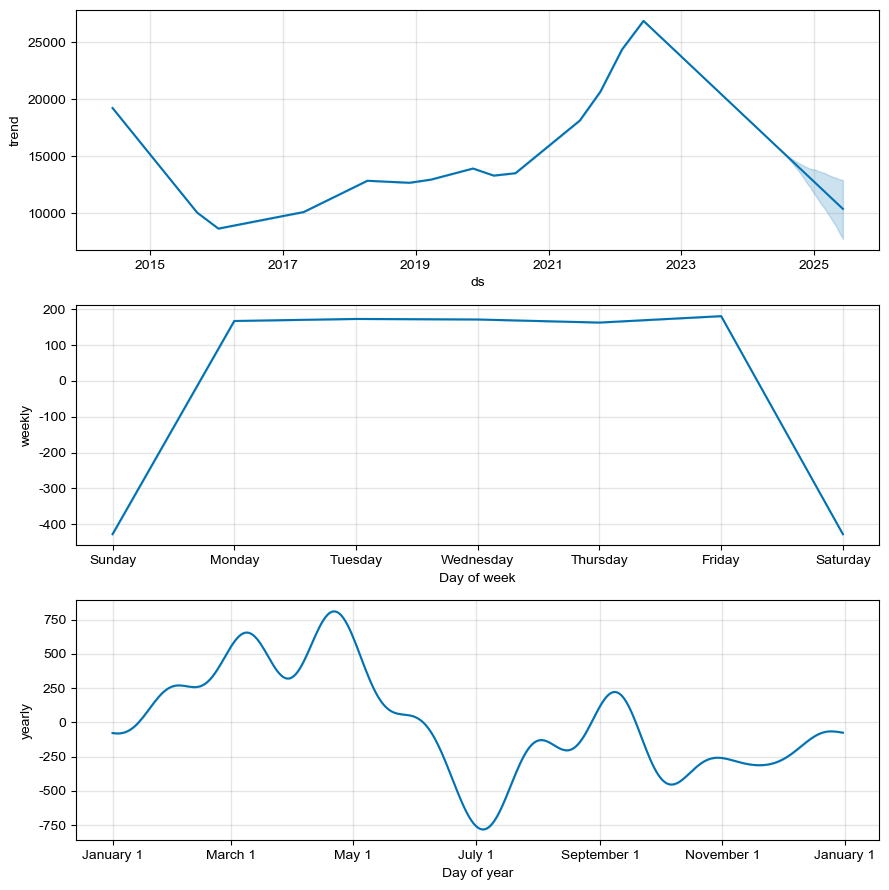

In [ ]:
# 예측 결과 그래프
fig1 = model.plot(forecast)
plt.title('Future Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 구성 요소 그래프
fig2 = model.plot_components(forecast)
plt.show()

# 광종별 국가별 생산량
### - 이 데이터엔 니켈만 있다!
단위 : 천불, 톤

In [ ]:
import pandas as pd
prod_country_mineral = pd.read_csv('광종별 국가별 생산량_20240520.csv', encoding='cp949')
prod_country_mineral

,광종,품목,대륙,국가,단위,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
0,알루미늄,bauxite,EUROPE,Bosnia,천톤,561.354,800.316,657.100,605.215,787.404,738.612,740.380,760.244,1043.343,619.748,675.269,669.926,542.114
1,알루미늄,bauxite,EUROPE,Croatia,천톤,0.000,0.000,0.000,0.000,11.900,9.800,12.200,11.800,14.300,14.100,14.500,13.800,13.800
2,알루미늄,bauxite,EUROPE,France,천톤,80.800,90.129,100.000,71.100,70.000,110.000,110.000,110.000,120.760,123.496,142.764,120.000,120.000
3,알루미늄,bauxite,EUROPE,Greece,천톤,2324.000,1815.328,1844.000,1876.000,1831.270,1880.000,1927.145,1559.360,1379.123,1428.639,1227.000,1173.000,869.100
4,알루미늄,bauxite,EUROPE,Hungary,천톤,277.800,255.100,93.700,14.400,8.300,16.700,4.000,5.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,아연,slab,AMERICA,Canada,천톤,662.151,648.619,651.637,649.218,683.118,691.400,598.438,620.202,654.971,685.400,639.843,569.613,502.000
691,아연,slab,AMERICA,Mexico,천톤,322.116,323.569,322.781,320.924,326.834,321.166,327.000,335.942,393.418,368.200,357.000,328.727,344.151
692,아연,slab,AMERICA,Peru,천톤,313.714,319.280,346.361,336.454,335.422,341.518,312.339,333.677,356.925,318.619,320.000,349.500,346.072
693,아연,slab,AMERICA,U.S.A.,천톤,248.000,261.000,233.000,180.000,172.000,126.000,132.000,116.000,115.000,180.000,216.000,216.000,220.000


In [ ]:
prod_country_nickel=prod_country_mineral[prod_country_mineral['광종']=='니켈']
prod_country_nickel.reset_index(drop=True)
prod_country_nickel

,광종,품목,대륙,국가,단위,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
442,니켈,mine,EUROPE,Albania,천톤,3.528,0.728,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548
443,니켈,mine,EUROPE,Finland,천톤,19.081,19.955,19.579,19.830,10.643,22.034,36.201,43.572,38.530,41.429,42.098,60.360,69.568
444,니켈,mine,EUROPE,Greece,천톤,21.100,21.550,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.000
445,니켈,mine,EUROPE,Kosovo,천톤,7.632,4.436,7.607,6.724,6.650,4.306,7.120,4.791,3.314,3.958,4.735,0.339,0.360
446,니켈,mine,EUROPE,Macedonia,천톤,3.600,1.704,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,니켈,refined,AMERICA,Dominican Republic,천톤,13.498,15.186,9.400,0.000,0.000,9.913,15.632,19.214,28.450,21.316,27.320,28.400,19.424
501,니켈,refined,AMERICA,Guatemala,천톤,0.000,0.000,0.000,2.985,10.818,8.688,12.417,14.688,20.323,22.894,19.931,18.419,1.514
502,니켈,refined,AMERICA,Venezuela,천톤,13.400,8.100,3.261,2.500,4.851,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
503,니켈,refined,OCEANIA,Australia,천톤,110.213,125.634,141.252,137.762,152.978,120.520,108.500,114.517,106.470,115.800,98.970,96.500,92.300


In [ ]:
# 인덱스 없애고 니켈뿐이니 니켈 컬럼, 단위(천톤)도 없애자.
prod_country_nickel.reset_index(drop=True, inplace=True)
prod_country_nickel

,광종,품목,대륙,국가,단위,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
0,니켈,mine,EUROPE,Albania,천톤,3.528,0.728,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548
1,니켈,mine,EUROPE,Finland,천톤,19.081,19.955,19.579,19.830,10.643,22.034,36.201,43.572,38.530,41.429,42.098,60.360,69.568
2,니켈,mine,EUROPE,Greece,천톤,21.100,21.550,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.000
3,니켈,mine,EUROPE,Kosovo,천톤,7.632,4.436,7.607,6.724,6.650,4.306,7.120,4.791,3.314,3.958,4.735,0.339,0.360
4,니켈,mine,EUROPE,Macedonia,천톤,3.600,1.704,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,니켈,refined,AMERICA,Dominican Republic,천톤,13.498,15.186,9.400,0.000,0.000,9.913,15.632,19.214,28.450,21.316,27.320,28.400,19.424
59,니켈,refined,AMERICA,Guatemala,천톤,0.000,0.000,0.000,2.985,10.818,8.688,12.417,14.688,20.323,22.894,19.931,18.419,1.514
60,니켈,refined,AMERICA,Venezuela,천톤,13.400,8.100,3.261,2.500,4.851,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
61,니켈,refined,OCEANIA,Australia,천톤,110.213,125.634,141.252,137.762,152.978,120.520,108.500,114.517,106.470,115.800,98.970,96.500,92.300


In [ ]:
# 필요없는 컬럼 삭제
prod_country_nickel.drop(prod_country_nickel.columns[[0,4]], axis=1, inplace=True)
prod_country_nickel

/var/folders/76/s5yjdqqx35ndv0dqcfnm6y0w0000gn/T/ipykernel_19205/705000549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_country_nickel.drop(prod_country_nickel.columns[[0,4]], axis=1, inplace=True)


,품목,대륙,국가,2011 생산량,2012 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
0,mine,EUROPE,Albania,3.528,0.728,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548
1,mine,EUROPE,Finland,19.081,19.955,19.579,19.830,10.643,22.034,36.201,43.572,38.530,41.429,42.098,60.360,69.568
2,mine,EUROPE,Greece,21.100,21.550,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.000
3,mine,EUROPE,Kosovo,7.632,4.436,7.607,6.724,6.650,4.306,7.120,4.791,3.314,3.958,4.735,0.339,0.360
4,mine,EUROPE,Macedonia,3.600,1.704,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,refined,AMERICA,Dominican Republic,13.498,15.186,9.400,0.000,0.000,9.913,15.632,19.214,28.450,21.316,27.320,28.400,19.424
59,refined,AMERICA,Guatemala,0.000,0.000,0.000,2.985,10.818,8.688,12.417,14.688,20.323,22.894,19.931,18.419,1.514
60,refined,AMERICA,Venezuela,13.400,8.100,3.261,2.500,4.851,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
61,refined,OCEANIA,Australia,110.213,125.634,141.252,137.762,152.978,120.520,108.500,114.517,106.470,115.800,98.970,96.500,92.300


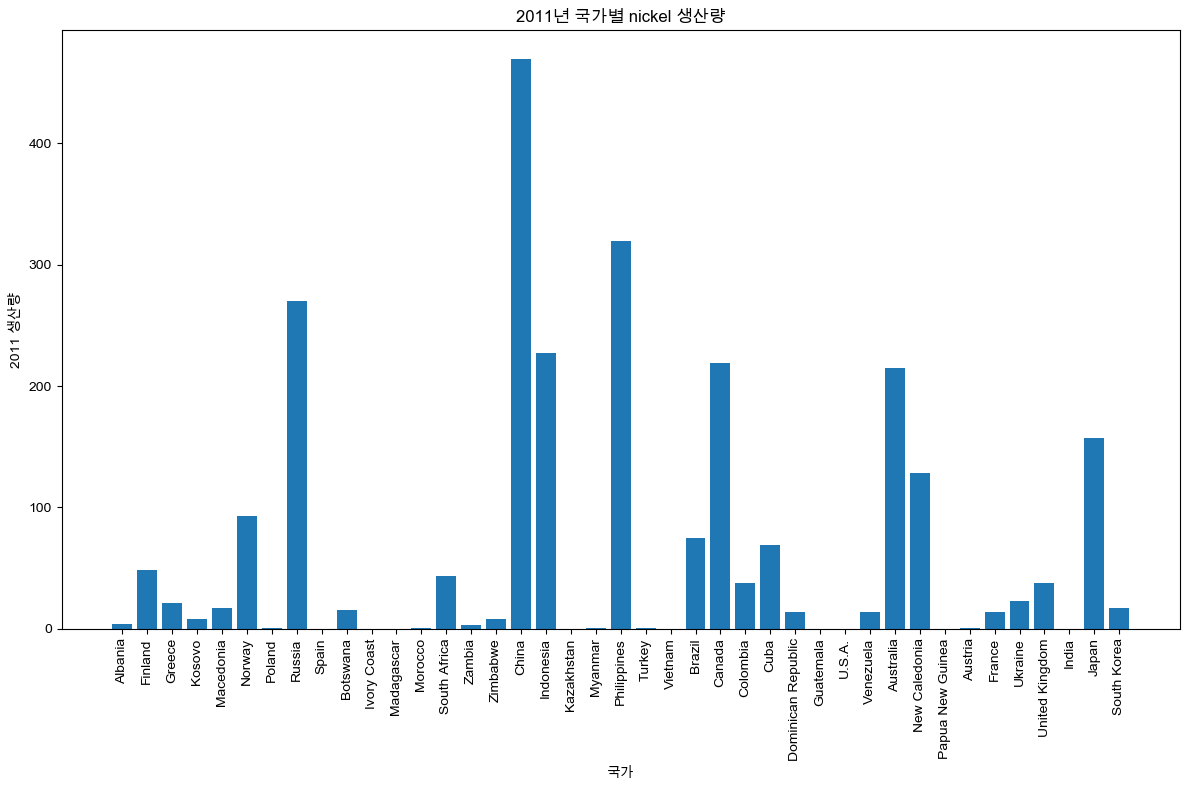

In [ ]:
# 바 차트 생성
plt.figure(figsize=(12, 8))
plt.bar(prod_country_nickel['국가'], prod_country_nickel['2011 생산량'])
plt.xlabel('국가')
plt.ylabel('2011 생산량')
plt.title('2011년 국가별 nickel 생산량')
plt.xticks(rotation=90)  # x축 레이블을 90도 회전
plt.tight_layout()
plt.show()

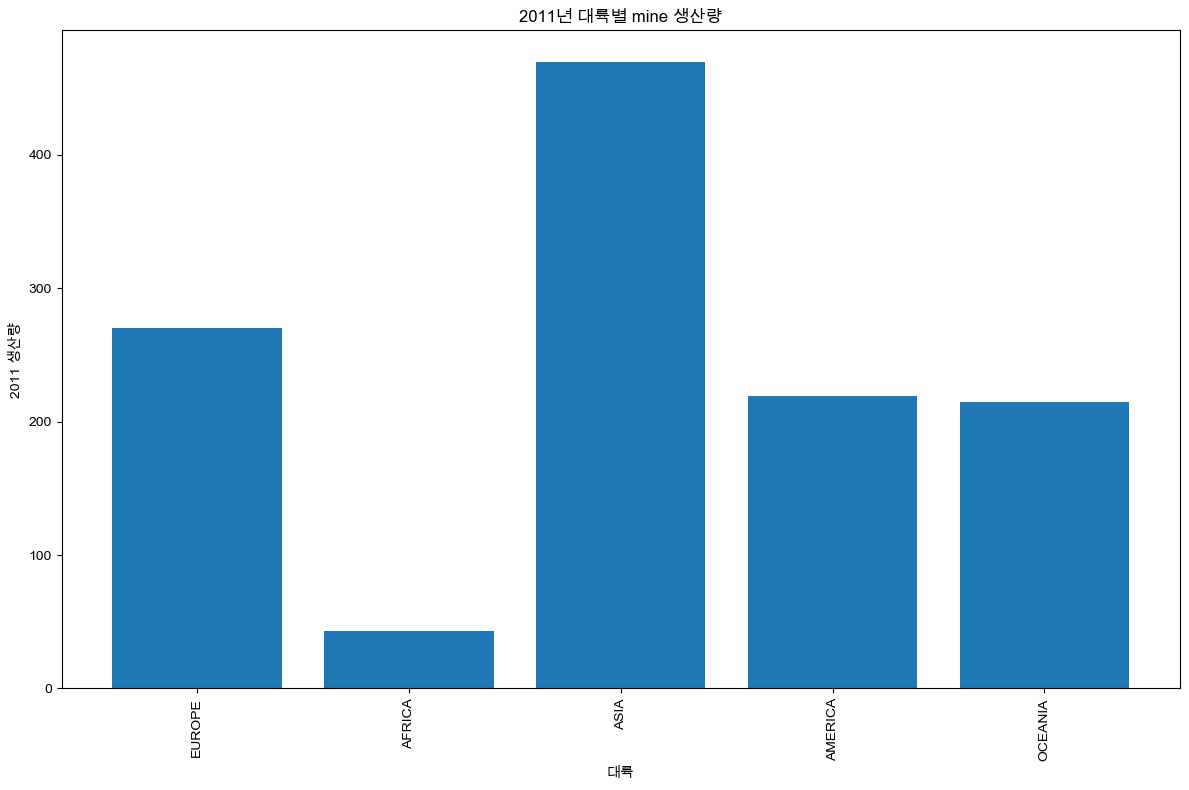

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(prod_country_nickel['대륙'], prod_country_nickel['2011 생산량'])
plt.xlabel('대륙')
plt.ylabel('2011 생산량')
plt.title('2011년 대륙별 mine 생산량')
plt.xticks(rotation=90)  # x축 레이블을 90도 회전
plt.tight_layout()
plt.show()

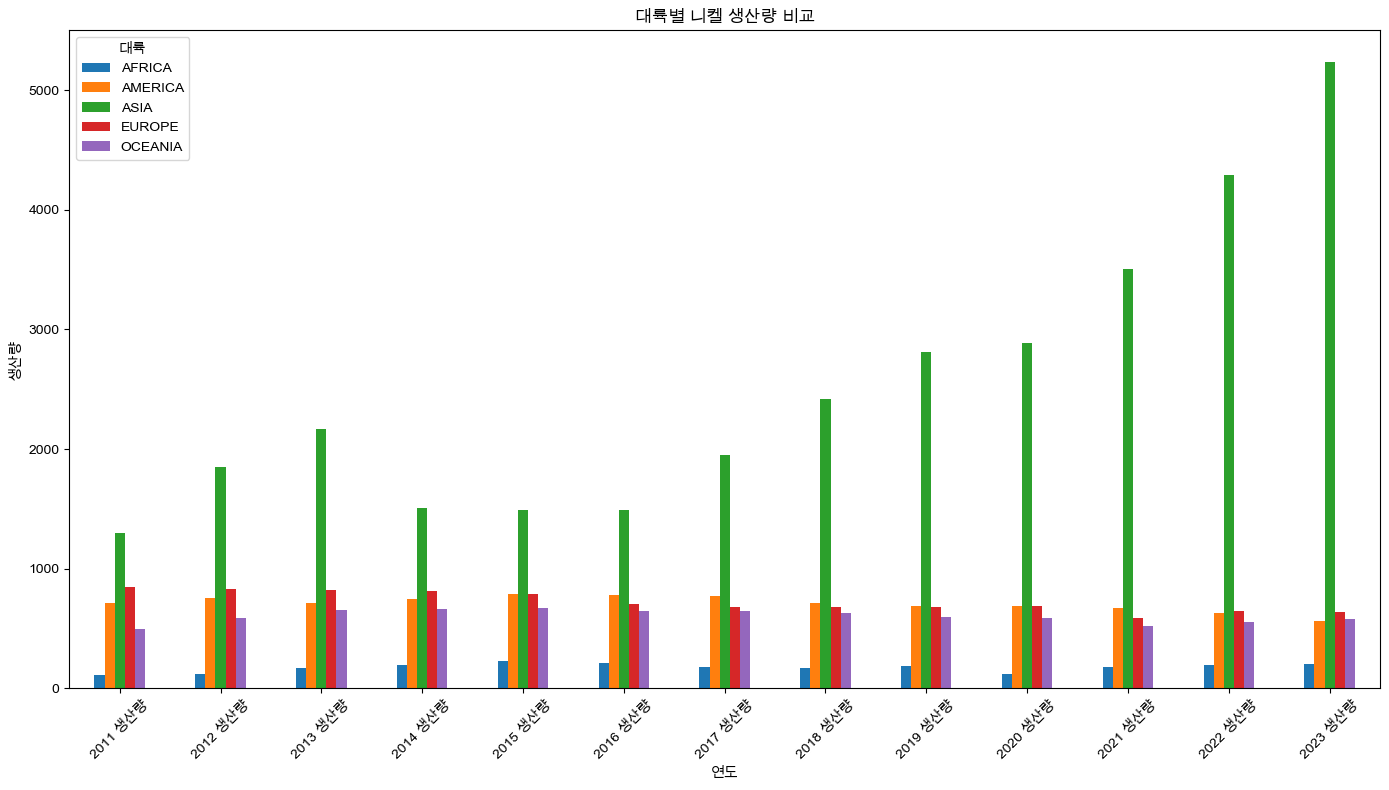

In [ ]:
# 연도별 생산량 데이터 추출
years = [str(year) + ' 생산량' for year in range(2011, 2024)]
# 대륙별 생산량 집계
continent_production = prod_country_nickel.groupby('대륙')[years].sum().T

# 그룹화된 바 차트 생성
continent_production.plot(kind='bar', figsize=(14, 8))
plt.xlabel('연도')
plt.ylabel('생산량')
plt.title('대륙별 니켈 생산량 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 필요없는 컬럼 삭제
prod_country_nickel.drop(prod_country_nickel.columns[[0,4]], axis=1, inplace=True)
prod_country_nickel

/var/folders/76/s5yjdqqx35ndv0dqcfnm6y0w0000gn/T/ipykernel_19205/705000549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_country_nickel.drop(prod_country_nickel.columns[[0,4]], axis=1, inplace=True)


,대륙,국가,2011 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
0,EUROPE,Albania,3.528,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548
1,EUROPE,Finland,19.081,19.579,19.830,10.643,22.034,36.201,43.572,38.530,41.429,42.098,60.360,69.568
2,EUROPE,Greece,21.100,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.000
3,EUROPE,Kosovo,7.632,7.607,6.724,6.650,4.306,7.120,4.791,3.314,3.958,4.735,0.339,0.360
4,EUROPE,Macedonia,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,AMERICA,Dominican Republic,13.498,9.400,0.000,0.000,9.913,15.632,19.214,28.450,21.316,27.320,28.400,19.424
59,AMERICA,Guatemala,0.000,0.000,2.985,10.818,8.688,12.417,14.688,20.323,22.894,19.931,18.419,1.514
60,AMERICA,Venezuela,13.400,3.261,2.500,4.851,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
61,OCEANIA,Australia,110.213,141.252,137.762,152.978,120.520,108.500,114.517,106.470,115.800,98.970,96.500,92.300


In [ ]:
# '국가'를 인덱스로 설정하고 2011년부터 2023년까지의 열만 남기기
prod_country_nickel.set_index('국가', inplace=True)
prod_country_nickel = prod_country_nickel.loc[:, '2011 생산량':'2023 생산량']

# 결과 출력
prod_country_nickel

,2011 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
국가,,,,,,,,,,,,
Albania,3.528,2.086,4.889,6.309,3.952,5.301,4.204,2.830,3.764,3.615,1.423,0.548
Finland,19.081,19.579,19.830,10.643,22.034,36.201,43.572,38.530,41.429,42.098,60.360,69.568
Greece,21.100,19.350,21.410,19.750,19.394,19.080,17.890,13.715,7.060,4.755,1.680,0.000
Kosovo,7.632,7.607,6.724,6.650,4.306,7.120,4.791,3.314,3.958,4.735,0.339,0.360
Macedonia,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
Dominican Republic,13.498,9.400,0.000,0.000,9.913,15.632,19.214,28.450,21.316,27.320,28.400,19.424
Guatemala,0.000,0.000,2.985,10.818,8.688,12.417,14.688,20.323,22.894,19.931,18.419,1.514
Venezuela,13.400,3.261,2.500,4.851,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


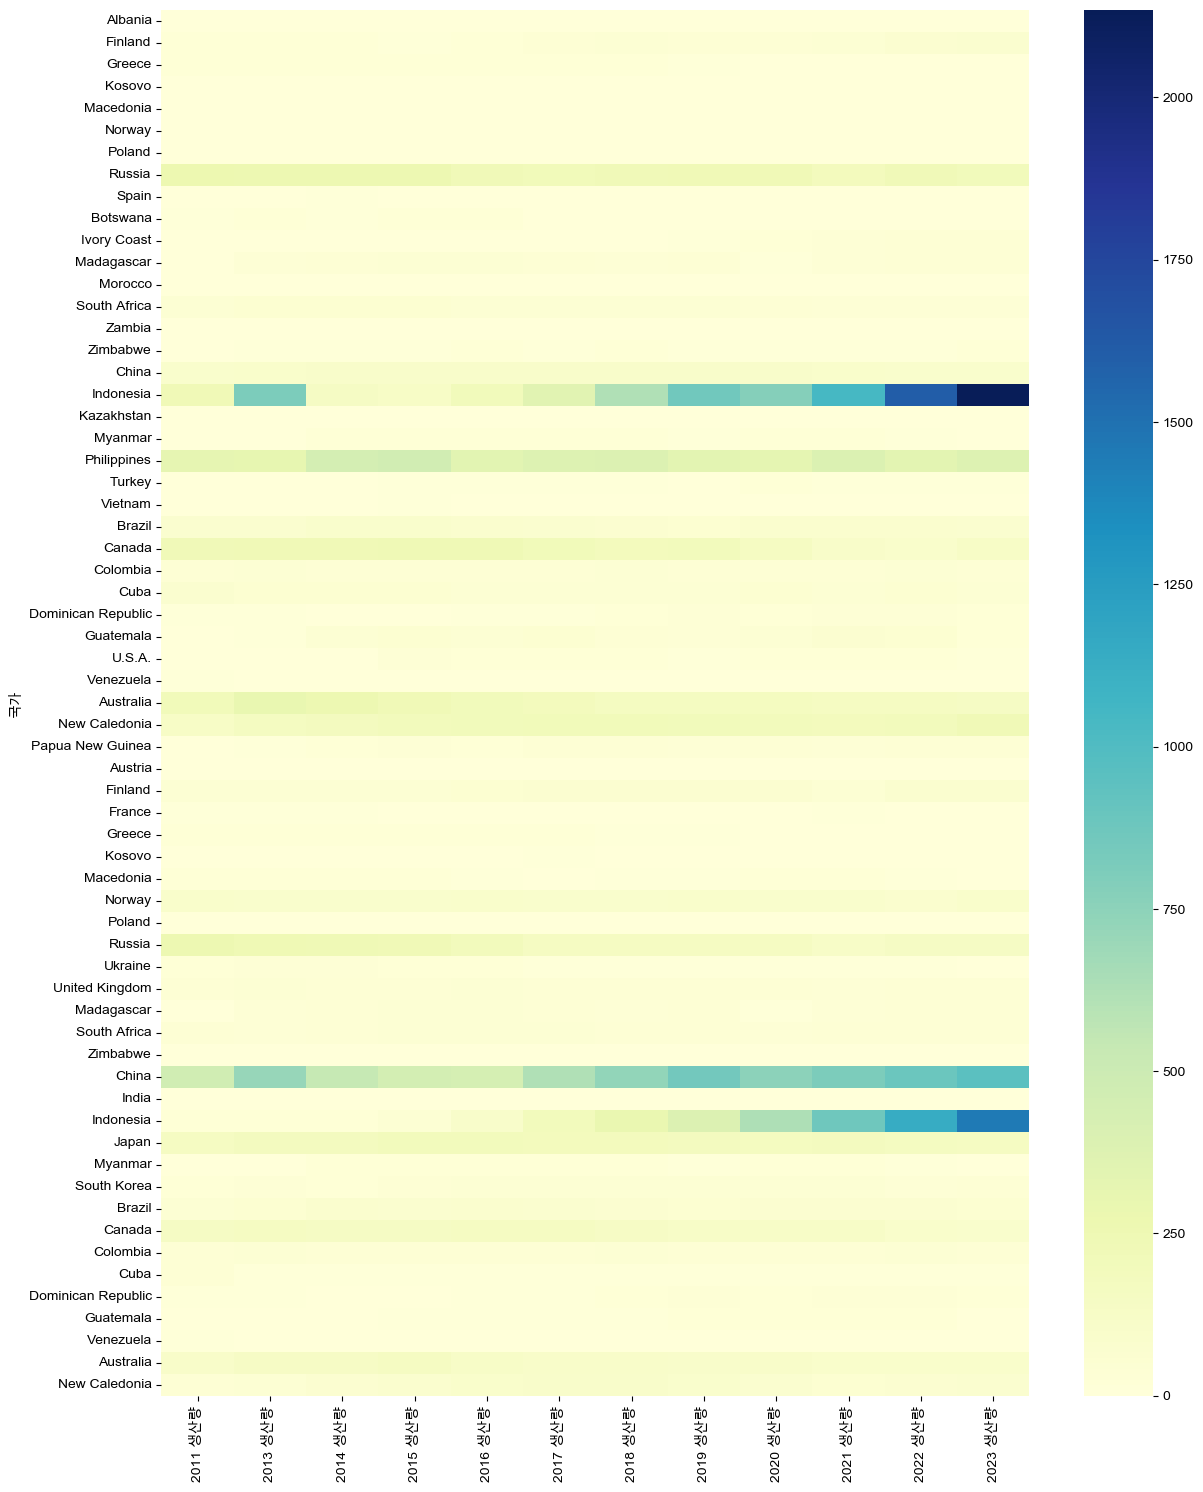

In [ ]:
# heatmap

plt.figure(figsize=(14,18))
sns.heatmap(data=prod_country_nickel, annot=False, fmt="f",cmap="YlGnBu") # annot=False는 숫자 데이터가 각 셀에 없다(데이터 값 표시), fmt=d는 정수형 f는 float형
plt.show()

- 인도네시아랑 중국이 두드러진다. 두 나라의 데이터를 보자.

In [ ]:
Ch_In_df = prod_country_nickel.loc[['China', 'Indonesia']]
Ch_In_df

,2011 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
국가,,,,,,,,,,,,
China,89.792,93.200,101.100,101.400,100.200,102.300,108.200,104.674,105.048,98.602,88.200,88.200
China,469.744,710.657,537.137,453.197,436.973,620.982,732.919,852.375,752.189,813.790,885.955,956.621
Indonesia,226.907,811.481,145.548,128.605,202.946,358.242,619.937,863.965,780.661,1042.814,1605.378,2134.837
Indonesia,19.690,22.849,21.603,47.430,105.071,197.338,287.736,386.418,630.358,873.144,1139.640,1455.111


In [ ]:
Ch_In_df = Ch_In_df.groupby('국가').sum().reset_index()
Ch_In_df

,국가,2011 생산량,2013 생산량,2014 생산량,2015 생산량,2016 생산량,2017 생산량,2018 생산량,2019 생산량,2020 생산량,2021 생산량,2022 생산량,2023 생산량
0,China,559.536,803.857,638.237,554.597,537.173,723.282,841.119,957.049,857.237,912.392,974.155,1044.821
1,Indonesia,246.597,834.330,167.151,176.035,308.017,555.580,907.673,1250.383,1411.019,1915.958,2745.018,3589.948


#### 데이터를 연도별로 변환

In [ ]:
df_melted = Ch_In_df.melt(id_vars=['국가'], var_name='연도', value_name='생산량')
df_melted

,국가,연도,생산량
0,China,2011 생산량,559.536
1,Indonesia,2011 생산량,246.597
2,China,2013 생산량,803.857
3,Indonesia,2013 생산량,834.330
4,China,2014 생산량,638.237
5,Indonesia,2014 생산량,167.151
6,China,2015 생산량,554.597
7,Indonesia,2015 생산량,176.035
8,China,2016 생산량,537.173
9,Indonesia,2016 생산량,308.017


In [ ]:
df_melted['연도'] = df_melted['연도'].str.extract('(\d+)').astype(int)
df_melted

,국가,연도,생산량
0,China,2011,559.536
1,Indonesia,2011,246.597
2,China,2013,803.857
3,Indonesia,2013,834.330
4,China,2014,638.237
5,Indonesia,2014,167.151
6,China,2015,554.597
7,Indonesia,2015,176.035
8,China,2016,537.173
9,Indonesia,2016,308.017


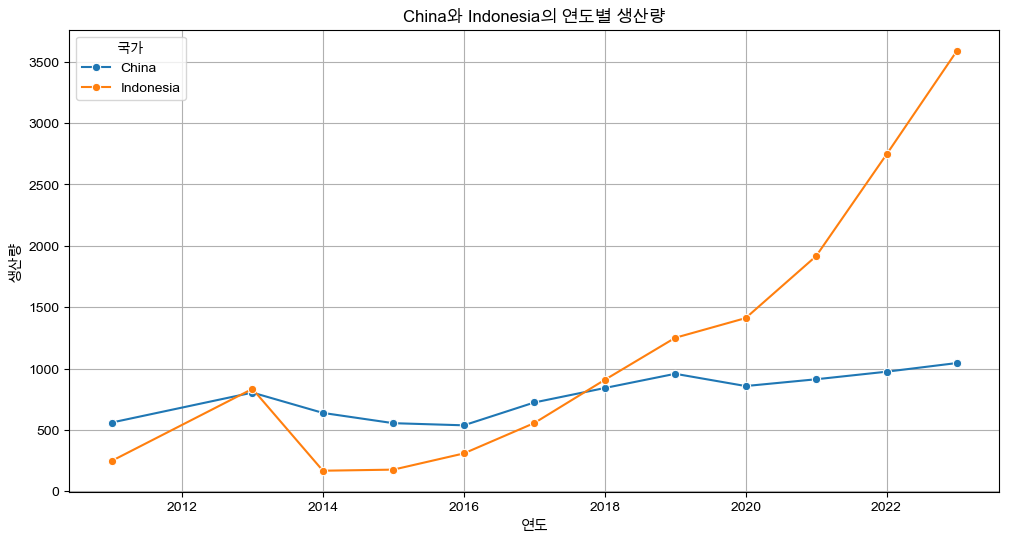

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='연도', y='생산량', hue='국가', marker='o')

plt.title('China와 Indonesia의 연도별 생산량')
plt.xlabel('연도')
plt.ylabel('생산량')
plt.legend(title='국가')
plt.grid(True)
plt.show()

# 국가별 광종 수출입 현황

단위 : 천불, 톤

In [ ]:
mineral_ie_country = pd.read_csv('국가별 광종 수출입 현황_20231231.csv', encoding='cp949')
mineral_ie_country

,기간,품목명,국가명,수출중량(톤),수출금액(천불),수입중량(톤),수입금액(천불)
0,2021,동,남아프리카공화국,NaN,NaN,NaN,NaN
1,2021,동,네덜란드,0.0,0.0,0.0,0.0
2,2021,동,독일,NaN,NaN,NaN,NaN
3,2021,동,러시아연방,0.0,0.0,0.0,12.0
4,2021,동,멕시코,0.0,0.0,10185.0,23815.0
...,...,...,...,...,...,...,...
1071,2022,토탄,캐나다,0.0,0.0,2891.0,1671.0
1072,2022,토탄,폴란드,0.0,0.0,2310.0,592.0
1073,2022,토탄,프랑스,0.0,0.0,0.0,0.0
1074,2022,토탄,핀란드,0.0,0.0,0.0,0.0


In [ ]:
Ni_ie_country = mineral_ie_country[mineral_ie_country['품목명']=='니켈']
Ni_ie_country

,기간,품목명,국가명,수출중량(톤),수출금액(천불),수입중량(톤),수입금액(천불)
444,2021,니켈,과테말라,NaN,NaN,NaN,NaN
445,2021,니켈,네덜란드,0.0,0.0,0.0,5.0
446,2021,니켈,뉴칼레도니아,0.0,0.0,3076534.0,330115.0
447,2021,니켈,독일,NaN,NaN,NaN,NaN
448,2021,니켈,러시아연방,NaN,NaN,NaN,NaN
449,2021,니켈,룩셈부르크,0.0,0.0,0.0,0.0
450,2021,니켈,미국,0.0,0.0,0.0,0.0
451,2021,니켈,볼리비아,NaN,NaN,NaN,NaN
452,2021,니켈,알바니아,NaN,NaN,NaN,NaN
453,2021,니켈,일본,86.0,42.0,0.0,0.0


In [ ]:
Ni_ie_country.dropna(inplace=True)
Ni_ie_country

/var/folders/76/s5yjdqqx35ndv0dqcfnm6y0w0000gn/T/ipykernel_19205/2814626010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ni_ie_country.dropna(inplace=True)


,기간,품목명,국가명,수출중량(톤),수출금액(천불),수입중량(톤),수입금액(천불)
445,2021,니켈,네덜란드,0.0,0.0,0.0,5.0
446,2021,니켈,뉴칼레도니아,0.0,0.0,3076534.0,330115.0
449,2021,니켈,룩셈부르크,0.0,0.0,0.0,0.0
450,2021,니켈,미국,0.0,0.0,0.0,0.0
453,2021,니켈,일본,86.0,42.0,0.0,0.0
454,2021,니켈,중국,0.0,0.0,0.0,0.0
455,2021,니켈,카자흐스탄,0.0,0.0,0.0,0.0
459,2021,니켈,필리핀,0.0,0.0,105000.0,10563.0
460,2021,니켈,호주,0.0,0.0,0.0,0.0
461,2022,니켈,과테말라,0.0,0.0,96424.0,13537.0


In [ ]:
# 0.0인 국가들의 행 삭제
Ni_ie_country = Ni_ie_country[~((Ni_ie_country['수출중량(톤)'] == 0.0) & (Ni_ie_country['수출금액(천불)'] == 0.0)& (Ni_ie_country['수입중량(톤)'] == 0.0)& (Ni_ie_country['수입금액(천불)'] == 0.0))]

Ni_ie_country

,기간,품목명,국가명,수출중량(톤),수출금액(천불),수입중량(톤),수입금액(천불)
445,2021,니켈,네덜란드,0.0,0.0,0.0,5.0
446,2021,니켈,뉴칼레도니아,0.0,0.0,3076534.0,330115.0
453,2021,니켈,일본,86.0,42.0,0.0,0.0
459,2021,니켈,필리핀,0.0,0.0,105000.0,10563.0
461,2022,니켈,과테말라,0.0,0.0,96424.0,13537.0
462,2022,니켈,네덜란드,0.0,0.0,0.0,5.0
463,2022,니켈,뉴칼레도니아,0.0,0.0,2401819.0,348833.0
467,2022,니켈,미국,0.0,0.0,0.0,1.0
470,2022,니켈,일본,46.0,64.0,0.0,0.0
471,2022,니켈,중국,62.0,143.0,0.0,0.0


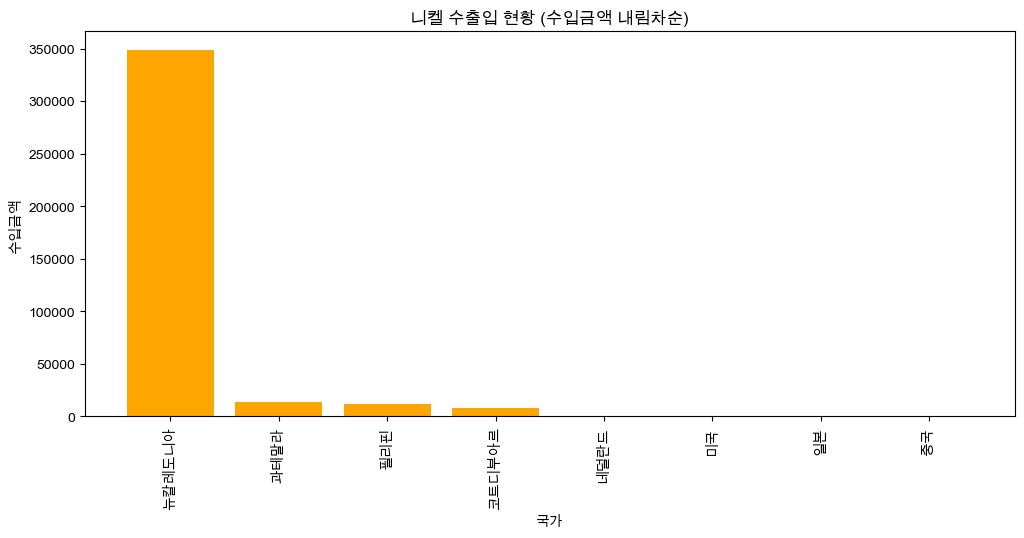

In [ ]:
sorted_df = Ni_ie_country.sort_values(by='수입금액(천불)', ascending=False)

plt.figure(figsize=(12, 5))
plt.bar(sorted_df['국가명'], sorted_df['수입금액(천불)'], color='orange')
plt.xlabel('국가')
plt.ylabel('수입금액')
plt.xticks(rotation=90)
plt.title('니켈 수출입 현황 (수입금액 내림차순)')
plt.show()